In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [1]:
# Import สิ่งที่จำเป็นต้องใช้
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import เครื่องมือจาก Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Scikit-learn มีชุดข้อมูลนี้ให้ใช้ได้เลย
from sklearn.datasets import load_iris

# โหลดข้อมูล
iris = load_iris()

# สร้าง DataFrame เพื่อให้ดูง่ายด้วย Pandas
# iris.data คือข้อมูล features
# iris.feature_names คือชื่อคอลัมน์
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# เพิ่มคอลัมน์ target (สายพันธุ์)
df['target'] = iris.target

# แสดง 5 แถวแรก
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [3]:
# แยกข้อมูล Features (X) และ Target (y)
X = df.drop('target', axis=1)
y = df['target']

# แบ่งข้อมูลเป็น Train 70% และ Test 30%
# random_state=42 เพื่อให้ผลการสุ่มเหมือนกันทุกครั้ง
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print('Train set shape:', X_train.shape)
print('Test set shape:', X_test.shape)

Train set shape: (105, 4)
Test set shape: (45, 4)


In [5]:
# 1. สร้าง object ของ StandardScaler
scaler = StandardScaler()

# 2. Fit scaler กับข้อมูล train เท่านั้น
scaler.fit(X_train)

# 3. Transform ทั้ง train และ test set
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ข้อมูลที่ถูก scale แล้วจะเป็น NumPy array
# เราสามารถแปลงกลับเป็น DataFrame เพื่อดูได้
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
print(df_train_scaled.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.050000e+02      1.050000e+02       1.050000e+02   
mean        2.541882e-15     -9.755094e-16      -2.706829e-16   
std         1.004796e+00      1.004796e+00       1.004796e+00   
min        -1.860374e+00     -2.421442e+00      -1.617194e+00   
25%        -8.957355e-01     -5.025635e-01      -1.266959e+00   
50%        -5.167705e-02     -2.284379e-02       2.507234e-01   
75%         6.718016e-01      6.967357e-01       7.177026e-01   
max         2.239339e+00      2.855474e+00       1.651661e+00   

       petal width (cm)  
count      1.050000e+02  
mean       1.353415e-16  
std        1.004796e+00  
min       -1.540971e+00  
25%       -1.135113e+00  
50%        8.245999e-02  
75%        7.588896e-01  
max        1.705891e+00  


In [6]:
# สร้างโมเดล k-NN โดยกำหนด k=3
# n_neighbors คือค่า k
knn = KNeighborsClassifier(n_neighbors=3)

# ฝึกฝนโมเดลด้วยข้อมูล train ที่ผ่านการ scale แล้ว
knn.fit(X_train_scaled, y_train)

print("โมเดล k-NN ถูกฝึกฝนเรียบร้อยแล้ว!")

โมเดล k-NN ถูกฝึกฝนเรียบร้อยแล้ว!


In [8]:
# ทำนายผลกับข้อมูล Test
predictions = knn.predict(X_test_scaled)
print("Predictions:", predictions)

Predictions: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0]


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


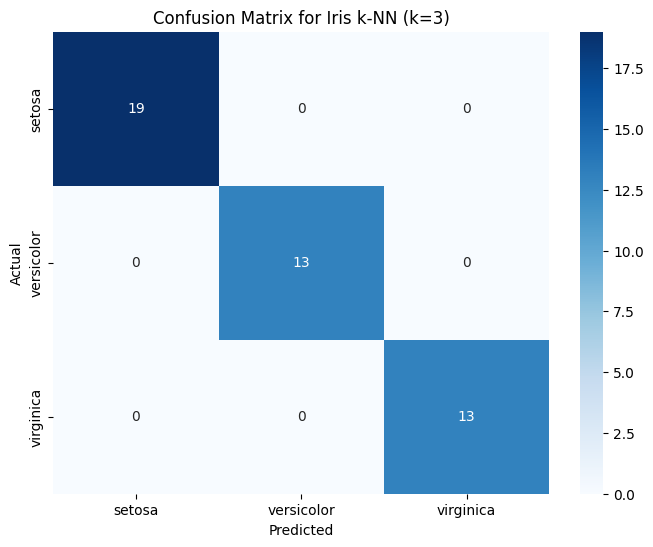

In [9]:
# Import function
from sklearn.metrics import confusion_matrix

# สร้าง confusion matrix
cm = confusion_matrix(y_test, predictions)

print("Confusion Matrix:")
print(cm)

# แสดงผลแบบสวยงามด้วย Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Iris k-NN (k=3)')
plt.show()

In [11]:
# Import function
from sklearn.metrics import classification_report

# พิมพ์รายงานสรุป
print(classification_report(y_test, predictions,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

